In [4]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import logging
import librosa
import sys
import tensorflow as tf
import plotly.graph_objects as go
import plotly.express as px
import re 



sns.set_theme()

In [5]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/script")

if module_path not in sys.path:
    sys.path.append(module_path+"/model")



logging.basicConfig(filename='../notebooks/deepmodel.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [6]:
#we import our module script that we shall be using for preprocessing
logging.info(" ===== Loading created scripts ===== ")
try:    
    import preprocessing
    
    logging.info(" ==== Succefully Loaded the Modules ===== ")
    print(" ===== Succefully loaded modules, modules are now ready to use ===== ")
except ImportError as error:
    
    logging.info(" !!!! Import Error  !!!! ")
    print(" !!!! The system ran into an Import Error \n ")
    print(error.__class__ )
    sys.exit(1)

 ===== Succefully loaded modules, modules are now ready to use ===== 


In [7]:
data =pd.read_csv('../data/master.csv')
data

,Unnamed: 0,wav,transcription,t_length,file_Location,duration
0,0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,../data/alldata/SWH-05-20101106_16k-emission_s...,3.100000
1,1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,../data/alldata/SWH-05-20101106_16k-emission_s...,3.650023
2,2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,../data/alldata/SWH-05-20101106_16k-emission_s...,3.900000
3,3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,../data/alldata/SWH-05-20101106_16k-emission_s...,2.940000
4,4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,../data/alldata/SWH-05-20101106_16k-emission_s...,2.450023
...,...,...,...,...,...,...
10174,10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,../data/alldata/SWH-15-20110310_16k-emission_s...,2.500091
10175,10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,../data/alldata/SWH-15-20110310_16k-emission_s...,2.910023
10176,10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,../data/alldata/SWH-15-20110310_16k-emission_s...,2.950023
10177,10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,../data/alldata/SWH-15-20110310_16k-emission_s...,2.590023


In [11]:
data=data.drop(['Unnamed: 0'], axis = 1)
data

,wav,transcription,t_length,file_Location,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,../data/alldata/SWH-05-20101106_16k-emission_s...,3.100000
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,../data/alldata/SWH-05-20101106_16k-emission_s...,3.650023
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,../data/alldata/SWH-05-20101106_16k-emission_s...,3.900000
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,../data/alldata/SWH-05-20101106_16k-emission_s...,2.940000
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,../data/alldata/SWH-05-20101106_16k-emission_s...,2.450023
...,...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,../data/alldata/SWH-15-20110310_16k-emission_s...,2.500091
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,../data/alldata/SWH-15-20110310_16k-emission_s...,2.910023
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,../data/alldata/SWH-15-20110310_16k-emission_s...,2.950023
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,../data/alldata/SWH-15-20110310_16k-emission_s...,2.590023


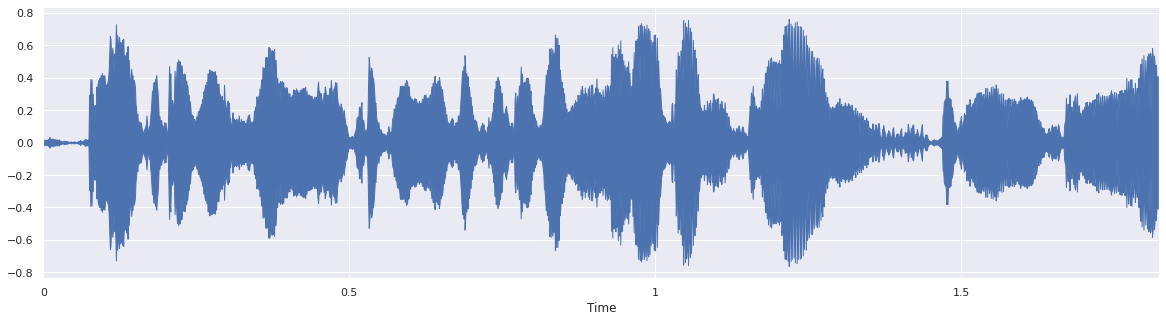

In [8]:
preprocessing.plot_wav(data['file_Location'][1],44100)

In [9]:
from IPython.display import Audio
Audio(data['file_Location'][1])

In [12]:
#we begin by making all text lower case
data['transcription']=data['transcription'].apply(lambda x: x.lower())

In [13]:
#we remove any punctuation marks that might hinder our model
import string
data['transcription']=data['transcription'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [14]:

data

,wav,transcription,t_length,file_Location,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,../data/alldata/SWH-05-20101106_16k-emission_s...,3.100000
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,../data/alldata/SWH-05-20101106_16k-emission_s...,3.650023
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,../data/alldata/SWH-05-20101106_16k-emission_s...,3.900000
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,../data/alldata/SWH-05-20101106_16k-emission_s...,2.940000
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,../data/alldata/SWH-05-20101106_16k-emission_s...,2.450023
...,...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,../data/alldata/SWH-15-20110310_16k-emission_s...,2.500091
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,../data/alldata/SWH-15-20110310_16k-emission_s...,2.910023
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,../data/alldata/SWH-15-20110310_16k-emission_s...,2.950023
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,../data/alldata/SWH-15-20110310_16k-emission_s...,2.590023


In [15]:

#remove any extra padding and whitespaces
data['transcription']=data['transcription'].apply(lambda x: re.sub(' +',' ',x))

In [16]:
"""
Defines two dictionaries for converting 
between text and integer sequences.
"""

char_map_str = """
' 0
 <SPACE> 1
 a 2
 b 3
 c 4
 d 5
 e 6
 f 7
 g 8
 h 9
 i 10
 j 11
 k 12
 l 13
 m 14
 n 15
 o 16
 p 17
 q 18
 r 19
 s 20
 t 21
 u 22
 v 23
 w 24
 x 25
 y 26
 z 27
 N 28
 U 29
 K 30
 1 31
 2 32
 3 33
 4 34
 5 35
 6 36
 7 37
 8 38
 9 39
 0 40
"""
# the "blank" character is mapped to 28

char_map = {}
index_map = {}
for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)+1] = ch
index_map[2] = ' '

In [17]:

char_map

{"'": 0,
 '<SPACE>': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27,
 'N': 28,
 'U': 29,
 'K': 30,
 '1': 31,
 '2': 32,
 '3': 33,
 '4': 34,
 '5': 35,
 '6': 36,
 '7': 37,
 '8': 38,
 '9': 39,
 '0': 40}

In [19]:
newdata=data[['file_Location','transcription','duration']]

In [20]:
newdata.columns=['key','text','duration']

In [21]:
newdata

,key,text,duration
0,../data/alldata/SWH-05-20101106_16k-emission_s...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,3.100000
1,../data/alldata/SWH-05-20101106_16k-emission_s...,inayokutangazia moja kwa moja kutoka jijini da...,3.650023
2,../data/alldata/SWH-05-20101106_16k-emission_s...,juma hili bara la afrika limeshuhudia raia wa ...,3.900000
3,../data/alldata/SWH-05-20101106_16k-emission_s...,wakipiga kura ya maoni ilikufanya mabadiliko ya,2.940000
4,../data/alldata/SWH-05-20101106_16k-emission_s...,kule abidjan raia wa jiji hilo,2.450023
...,...,...,...
10174,../data/alldata/SWH-15-20110310_16k-emission_s...,na somo lile lililopokelewa kule kenya,2.500091
10175,../data/alldata/SWH-15-20110310_16k-emission_s...,ambapo mtu aliyeshindwa kwenye uchaguzi,2.910023
10176,../data/alldata/SWH-15-20110310_16k-emission_s...,ni kauli yake mchambuzi wa masuala ya siasa,2.950023
10177,../data/alldata/SWH-15-20110310_16k-emission_s...,mwanasheria anayemtetea rais wa zamani wa liberia,2.590023


In [22]:
train_data=newdata.iloc[:8000,:]
valid_data=newdata.iloc[8001:,:]

print("Shape of new dataframes - {} , {}".format(train_data.shape, valid_data.shape))

Shape of new dataframes - (8000, 3) , (2178, 3)


In [23]:
train_data.to_json('../data/train_corpus.json', orient='records', lines=True)
valid_data.to_json('../data/valid_corpus.json', orient='records', lines=True)

In [24]:
import soundfile
from numpy.lib.stride_tricks import as_strided

def feat_dimen(window,max_freq):
    return int(0.001 * window * max_freq)+1

In [25]:
"""
Defines various functions for processing the data.
"""
import numpy as np
import soundfile
from numpy.lib.stride_tricks import as_strided


def calc_feat_dim(window, max_freq):
    return int(0.001 * window * max_freq) + 1

def conv_output_length(input_length, filter_size, border_mode, stride,
                       dilation=1):
    """ Compute the length of the output sequence after 1D convolution along
        time. Note that this function is in line with the function used in
        Convolution1D class from Keras.
    Params:
        input_length (int): Length of the input sequence.
        filter_size (int): Width of the convolution kernel.
        border_mode (str): Only support `same` or `valid`.
        stride (int): Stride size used in 1D convolution.
        dilation (int)
    """
    if input_length is None:
        return None
    assert border_mode in {'same', 'valid'}
    dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)
    if border_mode == 'same':
        output_length = input_length
    elif border_mode == 'valid':
        output_length = input_length - dilated_filter_size + 1
    return (output_length + stride - 1) // stride


def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram

    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).

    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x

    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs


def spectrogram_from_file(filename, step=10, window=20, max_freq=None,
                          eps=1e-14):
    """ Calculate the log of linear spectrogram from FFT energy
    Params:
        filename (str): Path to the audio file
        step (int): Step size in milliseconds between windows
        window (int): FFT window size in milliseconds
        max_freq (int): Only FFT bins corresponding to frequencies between
            [0, max_freq] are returned
        eps (float): Small value to ensure numerical stability (for ln(x))
    """
    with soundfile.SoundFile(filename) as sound_file:
        audio = sound_file.read(dtype='float32')
        sample_rate = sound_file.samplerate
        if audio.ndim >= 2:
            audio = np.mean(audio, 1)
        if max_freq is None:
            max_freq = sample_rate / 2
        if max_freq > sample_rate / 2:
            raise ValueError("max_freq must not be greater than half of "
                             " sample rate")
        if step > window:
            raise ValueError("step size must not be greater than window size")
        hop_length = int(0.001 * step * sample_rate)
        fft_length = int(0.001 * window * sample_rate)
        pxx, freqs = spectrogram(
            audio, fft_length=fft_length, sample_rate=sample_rate,
            hop_length=hop_length)
        ind = np.where(freqs <= max_freq)[0][-1] + 1
    return np.transpose(np.log(pxx[:ind, :] + eps))

def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    int_sequence = []
    for c in text:
        if c == ' ':
            ch = char_map['<SPACE>']
        else:
            ch = char_map[c]
        int_sequence.append(ch)
    return int_sequence

def int_sequence_to_text(int_sequence):
    """ Convert an integer sequence to text """
    text = []
    for c in int_sequence:
        ch = index_map[c]
        text.append(ch)
    return text


In [32]:
import json
import numpy as np
import random
from python_speech_features import mfcc
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable



RNG_SEED = 123

class AudioGenerator():
    def __init__(self, step=10, window=20, max_freq=8000, mfcc_dim=13,
        minibatch_size=4000, desc_file=None, spectrogram=True, max_duration=10.0, 
        sort_by_duration=False):
        """
        Params:
            step (int): Step size in milliseconds between windows (for spectrogram ONLY)
            window (int): FFT window size in milliseconds (for spectrogram ONLY)
            max_freq (int): Only FFT bins corresponding to frequencies between
                [0, max_freq] are returned (for spectrogram ONLY)
            desc_file (str, optional): Path to a JSON-line file that contains
                labels and paths to the audio files. If this is None, then
                load metadata right away
        """

        self.feat_dim = calc_feat_dim(window, max_freq)
        self.mfcc_dim = mfcc_dim
        self.feats_mean = np.zeros((self.feat_dim,))
        self.feats_std = np.ones((self.feat_dim,))
        self.rng = random.Random(RNG_SEED)
        if desc_file is not None:
            self.load_metadata_from_desc_file(desc_file)
        self.step = step
        self.window = window
        self.max_freq = max_freq
        self.cur_train_index = 0
        self.cur_valid_index = 0
        self.cur_test_index = 0
        self.max_duration=max_duration
        self.minibatch_size = minibatch_size
        self.spectrogram = spectrogram
        self.sort_by_duration = sort_by_duration


    def get_batch(self, partition):
        """ Obtain a batch of train, validation, or test data
        """
        if partition == 'train':
            audio_paths = self.train_audio_paths
            cur_index = self.cur_train_index
            texts = self.train_texts
        elif partition == 'valid':
            audio_paths = self.valid_audio_paths
            cur_index = self.cur_valid_index
            texts = self.valid_texts
        elif partition == 'test':
            audio_paths = self.test_audio_paths
            cur_index = self.test_valid_index
            texts = self.test_texts
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

        features = [self.normalize(self.featurize(a)) for a in 
            audio_paths[cur_index:cur_index+self.minibatch_size]]

        # calculate necessary sizes
        max_length = max([features[i].shape[0] 
            for i in range(0, self.minibatch_size)])
        max_string_length = max([len(texts[cur_index+i]) 
            for i in range(0, self.minibatch_size)])
        
        # initialize the arrays
        X_data = np.zeros([self.minibatch_size, max_length, 
            self.feat_dim*self.spectrogram + self.mfcc_dim*(not self.spectrogram)])
        labels = np.ones([self.minibatch_size, max_string_length]) * 28
        input_length = np.zeros([self.minibatch_size, 1])
        label_length = np.zeros([self.minibatch_size, 1])
        
        for i in range(0, self.minibatch_size):
            # calculate X_data & input_length
            feat = features[i]
            input_length[i] = feat.shape[0]
            X_data[i, :feat.shape[0], :] = feat

            # calculate labels & label_length
            label = np.array(text_to_int_sequence(texts[cur_index+i])) 
            labels[i, :len(label)] = label
            label_length[i] = len(label)
 
        # return the arrays
        outputs = {'ctc': np.zeros([self.minibatch_size])}
        inputs = {'the_input': X_data, 
                  'the_labels': labels, 
                  'input_length': input_length, 
                  'label_length': label_length 
                 }
        
        
        return (inputs, outputs)

    def shuffle_data_by_partition(self, partition):
        """ Shuffle the training or validation data
        """
        if partition == 'train':
            self.train_audio_paths, self.train_durations, self.train_texts = shuffle_data(
                self.train_audio_paths, self.train_durations, self.train_texts)
        elif partition == 'valid':
            self.valid_audio_paths, self.valid_durations, self.valid_texts = shuffle_data(
                self.valid_audio_paths, self.valid_durations, self.valid_texts)
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

    def sort_data_by_duration(self, partition):
        """ Sort the training or validation sets by (increasing) duration
        """
        if partition == 'train':
            self.train_audio_paths, self.train_durations, self.train_texts = sort_data(
                self.train_audio_paths, self.train_durations, self.train_texts)
        elif partition == 'valid':
            self.valid_audio_paths, self.valid_durations, self.valid_texts = sort_data(
                self.valid_audio_paths, self.valid_durations, self.valid_texts)
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")

    def next_train(self):
        """ Obtain a batch of training data
        """
        while True:
            ret = self.get_batch('train')
            self.cur_train_index += self.minibatch_size
            if self.cur_train_index >= len(self.train_texts) - self.minibatch_size:
                self.cur_train_index = 0
                self.shuffle_data_by_partition('train')
            yield ret    

    def next_valid(self):
        """ Obtain a batch of validation data
        """
        while True:
            ret = self.get_batch('valid')
            self.cur_valid_index += self.minibatch_size
            if self.cur_valid_index >= len(self.valid_texts) - self.minibatch_size:
                self.cur_valid_index = 0
                self.shuffle_data_by_partition('valid')
            yield ret

    def next_test(self):
        """ Obtain a batch of test data
        """
        while True:
            ret = self.get_batch('test')
            self.cur_test_index += self.minibatch_size
            if self.cur_test_index >= len(self.test_texts) - self.minibatch_size:
                self.cur_test_index = 0
            yield ret

    def load_train_data(self, desc_file='../data/train_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'train')
        self.fit_train()
        if self.sort_by_duration:
            self.sort_data_by_duration('train')

    def load_validation_data(self, desc_file='../data/valid_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'validation')
        if self.sort_by_duration:
            self.sort_data_by_duration('valid')

    def load_test_data(self, desc_file='../data/test_corpus.json'):
        self.load_metadata_from_desc_file(desc_file, 'test')
    
    def load_metadata_from_desc_file(self, desc_file, partition):
        """ Read metadata from a JSON-line file
            (possibly takes long, depending on the filesize)
        Params:
            desc_file (str):  Path to a JSON-line file that contains labels and
                paths to the audio files
            partition (str): One of 'train', 'validation' or 'test'
        """
        audio_paths, durations, texts = [], [], []
        with open(desc_file) as json_line_file:
            for line_num, json_line in enumerate(json_line_file):
                try:
                    spec = json.loads(json_line)
                    if float(spec['duration']) > self.max_duration:
                        continue
                    audio_paths.append(spec['key'])
                    durations.append(float(spec['duration']))
                    texts.append(spec['text'])
                except Exception as e:
                    # Change to (KeyError, ValueError) or
                    # (KeyError,json.decoder.JSONDecodeError), depending on
                    # json module version
                    print('Error reading line #{}: {}'
                                .format(line_num, json_line))
        if partition == 'train':
            self.train_audio_paths = audio_paths
            self.train_durations = durations
            self.train_texts = texts
        elif partition == 'validation':
            self.valid_audio_paths = audio_paths
            self.valid_durations = durations
            self.valid_texts = texts
        elif partition == 'test':
            self.test_audio_paths = audio_paths
            self.test_durations = durations
            self.test_texts = texts
        else:
            raise Exception("Invalid partition to load metadata. "
             "Must be train/validation/test")
            
    def fit_train(self, k_samples=100):
        """ Estimate the mean and std of the features from the training set
        Params:
            k_samples (int): Use this number of samples for estimation
        """
        k_samples = min(k_samples, len(self.train_audio_paths))
        samples = self.rng.sample(self.train_audio_paths, k_samples)
        feats = [self.featurize(s) for s in samples]
        feats = np.vstack(feats)
        self.feats_mean = np.mean(feats, axis=0)
        self.feats_std = np.std(feats, axis=0)
        
    def featurize(self, audio_clip):
        """ For a given audio clip, calculate the corresponding feature
        Params:
            audio_clip (str): Path to the audio clip
        """
        if self.spectrogram:
            return spectrogram_from_file(
                audio_clip, step=self.step, window=self.window,
                max_freq=self.max_freq)
        else:
            (rate, sig) = wav.read(audio_clip)
            return mfcc(sig, rate, numcep=self.mfcc_dim)

    def normalize(self, feature, eps=1e-14):
        """ Center a feature using the mean and std
        Params:
            feature (numpy.ndarray): Feature to normalize
        """
        return (feature - self.feats_mean) / (self.feats_std + eps)

def shuffle_data(audio_paths, durations, texts):
        """ Shuffle the data (called after making a complete pass through 
            training or validation data during the training process)
        Params:
            audio_paths (list): Paths to audio clips
            durations (list): Durations of utterances for each audio clip
            texts (list): Sentences uttered in each audio clip
        """
        p = np.random.permutation(len(audio_paths))
        audio_paths = [audio_paths[i] for i in p] 
        durations = [durations[i] for i in p] 
        texts = [texts[i] for i in p]
        return audio_paths, durations, texts

def sort_data(audio_paths, durations, texts):
        """ Sort the data by duration 
        Params:
            audio_paths (list): Paths to audio clips
            durations (list): Durations of utterances for each audio clip
            texts (list): Sentences uttered in each audio clip
        """
        p = np.argsort(durations).tolist()
        audio_paths = [audio_paths[i] for i in p]
        durations = [durations[i] for i in p] 
        texts = [texts[i] for i in p]
        return audio_paths, durations, texts

def vis_train_features(index=0):
        """ Visualizing the data point in the training set at the supplied index
        """
        # obtain spectrogram
        audio_gen = AudioGenerator(spectrogram=True)
        audio_gen.load_train_data()
        vis_audio_path = audio_gen.train_audio_paths[index]
        vis_spectrogram_feature = audio_gen.normalize(audio_gen.featurize(vis_audio_path))
        # obtain mfcc
        audio_gen = AudioGenerator(spectrogram=False)
        audio_gen.load_train_data()
        vis_mfcc_feature = audio_gen.normalize(audio_gen.featurize(vis_audio_path))
        # obtain text label
        vis_text = audio_gen.train_texts[index]
        # obtain raw audio
        vis_raw_audio, _ = librosa.load(vis_audio_path)
        # print total number of training examples
        print('There are %d total training examples.' % len(audio_gen.train_audio_paths))
        # return labels for plotting
        return vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path


def plot_raw_audio(vis_raw_audio):
        # plot the raw audio signal
        fig = plt.figure(figsize=(12,3))
        ax = fig.add_subplot(111)
        steps = len(vis_raw_audio)
        ax.plot(np.linspace(1, steps, steps), vis_raw_audio)
        plt.title('Audio Signal')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()

def plot_mfcc_feature(vis_mfcc_feature):
        # plot the MFCC feature
        fig = plt.figure(figsize=(12,5))
        ax = fig.add_subplot(111)
        im = ax.imshow(vis_mfcc_feature, cmap=plt.cm.jet, aspect='auto')
        plt.title('Normalized MFCC')
        plt.ylabel('Time')
        plt.xlabel('MFCC Coefficient')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        ax.set_xticks(np.arange(0, 13, 2), minor=False);
        plt.show()

def plot_spectrogram_feature(vis_spectrogram_feature):
        # plot the normalized spectrogram
        fig = plt.figure(figsize=(12,5))
        ax = fig.add_subplot(111)
        im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
        plt.title('Normalized Spectrogram')
        plt.ylabel('Time')
        plt.xlabel('Frequency')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        plt.show()


In [33]:
model=AudioGenerator()

In [34]:
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 8000 total training examples.


In [35]:
model.load_train_data()

In [36]:
model.load_validation_data()

In [37]:
model.fit_train()

In [38]:
a,b=model.get_batch('train')

In [39]:
dx = pd.DataFrame({'the_input': list(a['the_input']), 'the_labels': list(a['the_labels']), 'input_length': list(a['input_length']), 'label_length': list(a['label_length'])})

In [40]:
dx.to_csv('../data/procGen2.csv',index=False)

In [41]:
data.to_json('../data/train.json', orient='records', lines=True)

In [42]:
data.to_json('../data/train.json', orient='records', lines=True)

In [43]:
a,b=model.get_batch('valid')
dz = pd.DataFrame({'the_input': list(a['the_input']), 'the_labels': list(a['the_labels']), 'input_length': list(a['input_length']), 'label_length': list(a['label_length'])})

IndexError: list index out of range

In [44]:
!pip3 install --user --upgrade tensorflow

     |████████████████████▌           | 293.2 MB 154.7 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 458.4 MB 6.8 kB/s 
     |████████████████████████████████| 1.3 MB 77.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 78.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 108.7 MB/s eta 0:00:01
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=53d035bced88824f15529e2979267a7bf00a52cf367e61fc121c2bab6bc0cfa5
  Stored in directory: /home/jakinda_oluoch/.cache/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
Successfully built clang
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [45]:
#from keras.backend.tensorflow_backend import set_session
#from tensorflow.keras.backend.tensorflow_backend import set_session
from tensorflow.compat.v1 import keras
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
tf.keras.backend.set_session(tf.Session(config=config))

Instructions for updating:
non-resource variables are not supported in the long term



2021-08-12 14:46:48.421334: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-12 14:46:48.422881: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-12 14:46:48.448083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 14:46:48.448674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-12 14:4

In [46]:
from keras import backend as K
from keras.models import Model
from keras.layers import (BatchNormalization, Conv1D, Dense, Input, 
    TimeDistributed, Activation, Bidirectional, SimpleRNN, GRU, LSTM)

def simple_rnn_model(input_dim, output_dim=42):
    """ Build a recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add recurrent layer
    simp_rnn = GRU(output_dim, return_sequences=True, 
                 implementation=2, name='rnn')(input_data)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(simp_rnn)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

def rnn_model(input_dim, units, activation, output_dim=42):
    """ Build a recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add recurrent layer
    simp_rnn = GRU(units, activation=activation,
        return_sequences=True, implementation=2, name='rnn')(input_data)
    # TODO: Add batch normalization 
   
    bn_rnn = BatchNormalization()(simp_rnn)
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model


def cnn_rnn_model(input_dim, filters, kernel_size, conv_stride,
    conv_border_mode, units, output_dim=42):
    """ Build a recurrent + convolutional network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add convolutional layer
    conv_1d = Conv1D(filters, kernel_size, 
                     strides=conv_stride, 
                     padding=conv_border_mode,
                     activation='relu',
                     name='conv1d')(input_data)
    # Add batch normalization
    bn_cnn = BatchNormalization(name='bn_conv_1d')(conv_1d)
    # Add a recurrent layer
    simp_rnn = SimpleRNN(units, activation='relu',
        return_sequences=True, implementation=2, name='rnn')(bn_cnn)
    # TODO: Add batch normalization
    bn_rnn = BatchNormalization(name='bn_norm')(simp_rnn)
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: cnn_output_length(
        x, kernel_size, conv_border_mode, conv_stride)
    print(model.summary())
    return model

def cnn_output_length(input_length, filter_size, border_mode, stride,
                       dilation=1):
    """ Compute the length of the output sequence after 1D convolution along
        time. Note that this function is in line with the function used in
        Convolution1D class from Keras.
    Params:
        input_length (int): Length of the input sequence.
        filter_size (int): Width of the convolution kernel.
        border_mode (str): Only support `same` or `valid`.
        stride (int): Stride size used in 1D convolution.
        dilation (int)
    """
    if input_length is None:
        return None
    assert border_mode in {'same', 'valid'}
    dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)
    if border_mode == 'same':
        output_length = input_length
    elif border_mode == 'valid':
        output_length = input_length - dilated_filter_size + 1
    return (output_length + stride - 1) // stride

def deep_rnn_model(input_dim, units, recur_layers, output_dim=42):
    """ Build a deep recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # TODO: Add recurrent layers, each with batch normalization
    
    
    simp_rnn = SimpleRNN(units, activation='relu',
        return_sequences=True, implementation=2, name='rnn')(input_data)
    # TODO: Add batch normalization
    
    bn_rnn = BatchNormalization(name='bn_norm')(simp_rnn)
    
    ## the loop should be here
    for i in range(1, recur_layers):
        print("+Layer", i)
    
        #simp_rnn = LSTM(units, name='rnn' + str(i), return_sequences=True)(bn_rnn)
        #simp_rnn = SimpleRNN(units, name='rnn' + str(i), return_sequences=True, activation='relu')(bn_rnn)
        simp_rnn = GRU(units, name='rnn' + str(i), return_sequences=True, activation='relu')(bn_rnn)
        # TODO: Add batch normalization
        bn_rnn = BatchNormalization(name='bnorm' + str(i))(simp_rnn)
   
                                    
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

def bidirectional_rnn_model(input_dim, units, output_dim=42):
    """ Build a bidirectional recurrent network for speech
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # TODO: Add bidirectional recurrent layer
    bidir_rnn = Bidirectional(LSTM(units, return_sequences=True))(input_data)
  
   # bidir_rnn = GRU(units, activation='relu',
   #     return_sequences=True, implementation=2, name='rnn')(input_data)
    bn_rnn = BatchNormalization(name='bnorm')(bidir_rnn)
    
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

def final_model(input_dim, units, output_dim=42):
    """ Build a deep network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # TODO: Specify the layers in your network
    
    bidir_rnn1 = Bidirectional(LSTM(units, return_sequences=True, dropout_W=0.5, dropout_U=0.5,
         name='bidir_rnn1'))(input_data)
    
    bn_rnn1 = BatchNormalization(name='bnorm1')(bidir_rnn1)
    
    bidir_rnn2 = Bidirectional(LSTM(units, return_sequences=True, 
         name='bidir_rnn2'))(bn_rnn1)
    
    bn_rnn2 = BatchNormalization(name='bnorm2')(bidir_rnn2)
 
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn2)
        
    # TODO: Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    # TODO: Specify model.output_length
    model.output_length = model.output_length = lambda x: x
    print(model.summary())
    return model


In [47]:
model_1 = rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                    units=200,
                    activation='relu')

Instructions for updating:
Colocations handled automatically by placer.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
rnn (GRU)                    (None, None, 200)         217200    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 200)         800       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 42)          8442      
_________________________________________________________________
softmax (Activation)         (None, None, 42)          0         
Total params: 226,442
Trainable params: 226,042
Non-trainable params: 400
_________________________________________________________________
None


In [48]:
"""
Defines a functions for training a NN.
"""


import _pickle as pickle

from keras import backend as K
from keras.models import Model
from keras.layers import (Input, Lambda)
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint   
import os

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

def add_ctc_loss(input_to_softmax):
    the_labels = Input(name='the_labels', shape=(None,), dtype='float32')
    input_lengths = Input(name='input_length', shape=(1,), dtype='int64')
    label_lengths = Input(name='label_length', shape=(1,), dtype='int64')
    output_lengths = Lambda(input_to_softmax.output_length)(input_lengths)
    # CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')(
        [input_to_softmax.output, the_labels, output_lengths, label_lengths])
    model = Model(
        inputs=[input_to_softmax.input, the_labels, input_lengths, label_lengths], 
        outputs=loss_out)
    return model

def train_model(input_to_softmax, 
                pickle_path,
                save_model_path,
                train_json='../data/train_corpus.json',
                valid_json='../data/valid_corpus.json',
                minibatch_size=20,
                spectrogram=True,
                mfcc_dim=13,
                optimizer='adam',
                epochs=20,
                verbose=1,
                sort_by_duration=False,
                max_duration=10.0):
    
    # create a class instance for obtaining batches of data
    audio_gen = AudioGenerator(minibatch_size=minibatch_size, 
        spectrogram=spectrogram, mfcc_dim=mfcc_dim, max_duration=max_duration,
        sort_by_duration=sort_by_duration)
    # add the training data to the generator
    audio_gen.load_train_data(train_json)
    audio_gen.load_validation_data(valid_json)
    # calculate steps_per_epoch
    num_train_examples=len(audio_gen.train_audio_paths)
    steps_per_epoch = num_train_examples//minibatch_size
    # calculate validation_steps
    num_valid_samples = len(audio_gen.valid_audio_paths) 
    validation_steps = num_valid_samples//minibatch_size
    
    # add CTC loss to the NN specified in input_to_softmax
    model = add_ctc_loss(input_to_softmax)

    # CTC loss is implemented elsewhere, so use a dummy lambda function for the loss
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)

    # make results/ directory, if necessary
    if not os.path.exists('results'):
        os.makedirs('results')

    # add checkpointer
    checkpointer = ModelCheckpoint(filepath='results/'+save_model_path, verbose=0)

    # train the model
    hist = model.fit_generator(generator=audio_gen.next_train(), steps_per_epoch=steps_per_epoch,
        epochs=epochs, validation_data=audio_gen.next_valid(), validation_steps=validation_steps,
        callbacks=[checkpointer], verbose=verbose)

    # save model loss
    with open('results/'+pickle_path, 'wb') as f:
        pickle.dump(hist.history, f)

In [49]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_1.pickle', 
            save_model_path='model_1.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

Epoch 1/20


2021-08-12 14:47:28.992208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 14:47:28.992723: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-12 14:47:28.992739: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1766] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-08-12 14:47:28.993020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamE

400/400 [==============================] - 281s 700ms/step - batch: 199.5000 - size: 20.0000 - loss: 195.6306 - val_loss: 145.6280
Epoch 2/20
400/400 [==============================] - 282s 705ms/step - batch: 199.5000 - size: 20.0000 - loss: 126.9677 - val_loss: 112.7780
Epoch 3/20
400/400 [==============================] - 283s 709ms/step - batch: 199.5000 - size: 20.0000 - loss: 106.9652 - val_loss: 101.7624
Epoch 4/20
400/400 [==============================] - 281s 702ms/step - batch: 199.5000 - size: 20.0000 - loss: 97.2194 - val_loss: 94.0528
Epoch 5/20
400/400 [==============================] - 281s 703ms/step - batch: 199.5000 - size: 20.0000 - loss: 90.6132 - val_loss: 90.2949
Epoch 6/20
400/400 [==============================] - 281s 703ms/step - batch: 199.5000 - size: 20.0000 - loss: 85.8213 - val_loss: 87.3860
Epoch 7/20
400/400 [==============================] - 278s 694ms/step - batch: 199.5000 - size: 20.0000 - loss: 82.7625 - val_loss: 84.5891
Epoch 8/20
400/400 [=====

In [54]:
model_1 = rnn_model(input_dim=13, 
                    units=200,
                    activation='relu')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
rnn (GRU)                    (None, None, 200)         128400    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 200)         800       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 42)          8442      
_________________________________________________________________
softmax (Activation)         (None, None, 42)          0         
Total params: 137,642
Trainable params: 137,242
Non-trainable params: 400
_________________________________________________________________
None


In [ ]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_2.pickle', 
            save_model_path='model_2.h5',
            spectrogram=False)

Epoch 1/20
400/400 [==============================] - 530s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 204.3438 - val_loss: 153.2847
Epoch 2/20
400/400 [==============================] - 530s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 131.2116 - val_loss: 123.1464
Epoch 3/20
400/400 [==============================] - 523s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 113.4363 - val_loss: 112.6989
Epoch 4/20
400/400 [==============================] - 518s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 103.4006 - val_loss: 99.9319
Epoch 5/20
400/400 [==============================] - 506s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 97.2179 - val_loss: 95.0764
Epoch 6/20
400/400 [==============================] - 518s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 92.4963 - val_loss: 91.5697
Epoch 7/20
400/400 [==============================] - 519s 1s/step - batch: 199.5000 - size: 20.0000 - loss: 88.4009 - val_loss: 89.1455
Epoch 8/20
330/400 [==============